### Database

In [ ]:
import os
import pandas as pd
import sqlite3
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

# Get the absolute path to your SQLite database
sqlite_path = os.path.abspath("procore_db.sqlite")

# Connect to the SQLite database
conn = sqlite3.connect(sqlite_path)

# Read data from the 'users' table into a pandas DataFrame
dataframe = pd.read_sql_query("SELECT * FROM users", conn)

# Close the database connection
conn.close()

# Initialize the OpenAI LLM with your API key
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
llm = OpenAI(api_token=OPENAI_API_KEY)

# Create a SmartDataframe using the DataFrame and LLM
df = SmartDataframe(dataframe, config={"llm": llm})

# Use the chat function as intended
answer = df.chat('Please provide me with the users cities in graph.')
print("answer:", answer)

# csv

{'type': 'plot', 'value': 'e:/Github/complaints predictor/exports/charts/temp_chart.png'}
{'type': 'plot', 'value': 'e:/Github/complaints predictor/exports/charts/temp_chart.png'}
{'type': 'plot', 'value': 'e:/Github/complaints predictor/exports/charts/temp_chart.png'}
answer: Unfortunately, I was not able to answer your question, because of the following error:

Value type <class 'str'> must match with type plot



Traceback (most recent call last):
  File "f:\Khalid\Documents\miniconda3\envs\langchain\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "f:\Khalid\Documents\miniconda3\envs\langchain\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "f:\Khalid\Documents\miniconda3\envs\langchain\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "f:\Khalid\Documents\miniconda3\envs\langchain\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "f:\Khalid\Documents\miniconda3\envs\langchain\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 97, in execute
    raise InvalidOutputValueMismatch(
pandasai.exceptions.InvalidOutputValueMismatch: Value type <class 'str'> must match with type plot


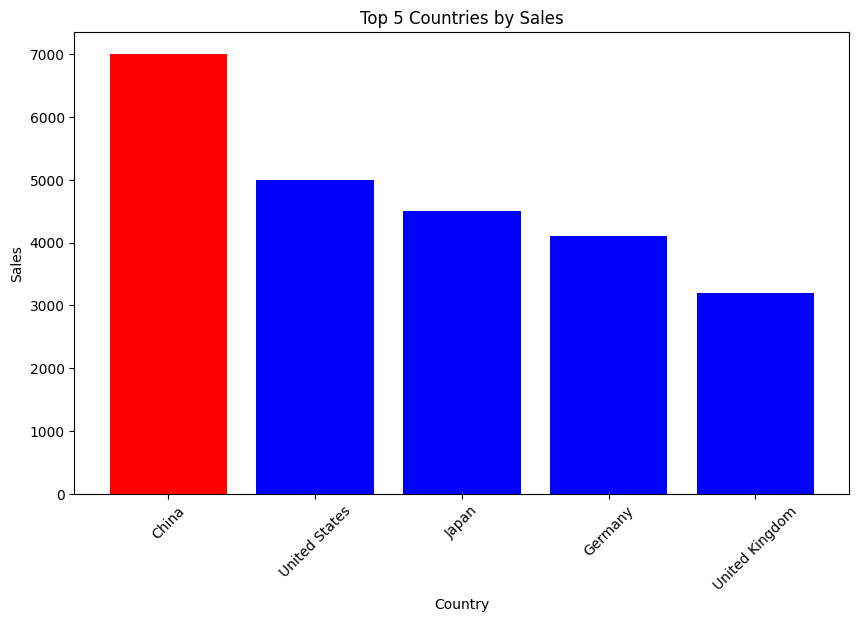

In [1]:
import os
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

# Sample DataFrame
sales_by_country = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "sales": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)

OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")

llm = OpenAI()

df = SmartDataframe(sales_by_country, config={"llm": llm})
a= df.chat('Which are the top 5 countries by sales? and plot it color the top country red')
# Output: China, United States, Japan, Germany, Australia
print("answer:",a)


### use langchain experimental

In [2]:
import pandas as pd
import random

def generate_riyadh_coords():
    # Riyadh approximate bounds
    lat_min, lat_max = 24.6, 24.85
    lon_min, lon_max = 46.6, 46.8
    
    return (
        round(random.uniform(lat_min, lat_max), 6),
        round(random.uniform(lon_min, lon_max), 6)
    )

# Load your CSV
df = pd.read_csv("data/pandas_city_complaints2.csv")

# Generate new coordinates
df['latitude'], df['longitude'] = zip(*df.apply(lambda x: generate_riyadh_coords(), axis=1))

# Save back to CSV
df.to_csv("updated_riyadh_complaints.csv", index=False)

In [72]:
import os
from dotenv import load_dotenv
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI

import pandas as pd
from langchain_openai import OpenAI

load_dotenv()
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")

df = pd.read_csv(
    f"data/pandas_city_complaints2.csv"
)
agent = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0, model="gpt-4o"),
    df,
    verbose=False,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True,
    temperature=0
)

f:\Khalid\Documents\miniconda3\envs\langchain\Lib\site-packages\langchain_experimental\agents\agent_toolkits\pandas\base.py:283: UserWarning: Received additional kwargs {'temperature': 0} which are no longer supported.
  warnings.warn(


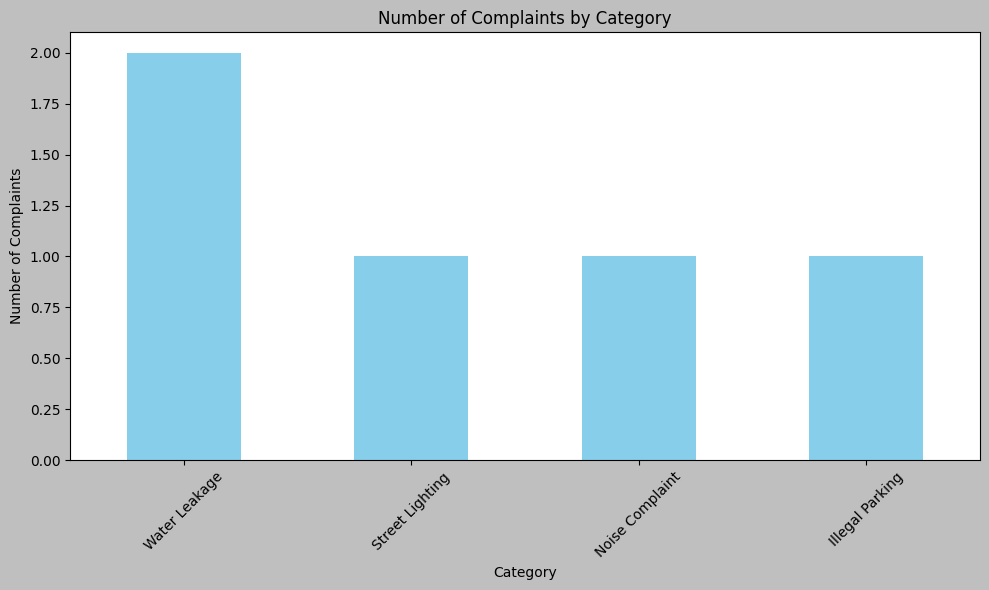

{'input': 'Can you create a bar chart showing the number of complaints by category?',
 'output': 'Here is the bar chart showing the number of complaints by category:\n\n- The chart displays the number of complaints for each category, such as "Water Leakage," "Street Lighting," "Noise Complaint," and "Illegal Parking."\n- The x-axis represents the different complaint categories, while the y-axis shows the number of complaints in each category.\n- The chart provides a visual representation of the distribution of complaints across different categories.'}

In [73]:
import pandas as pd
agent.invoke("Can you create a bar chart showing the number of complaints by category?")


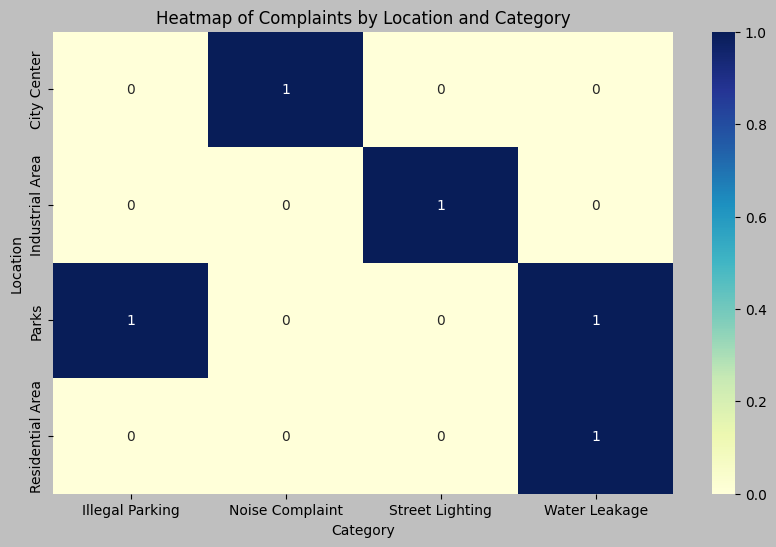

{'input': 'Can you plot a heatmap of complaints by location?',
 'output': 'Here is the heatmap of complaints by location and category. The heatmap visualizes the number of complaints for each category at different locations, with the color intensity representing the count of complaints.'}

In [74]:
import pandas as pd
agent.invoke("Can you plot a heatmap of complaints by location?")

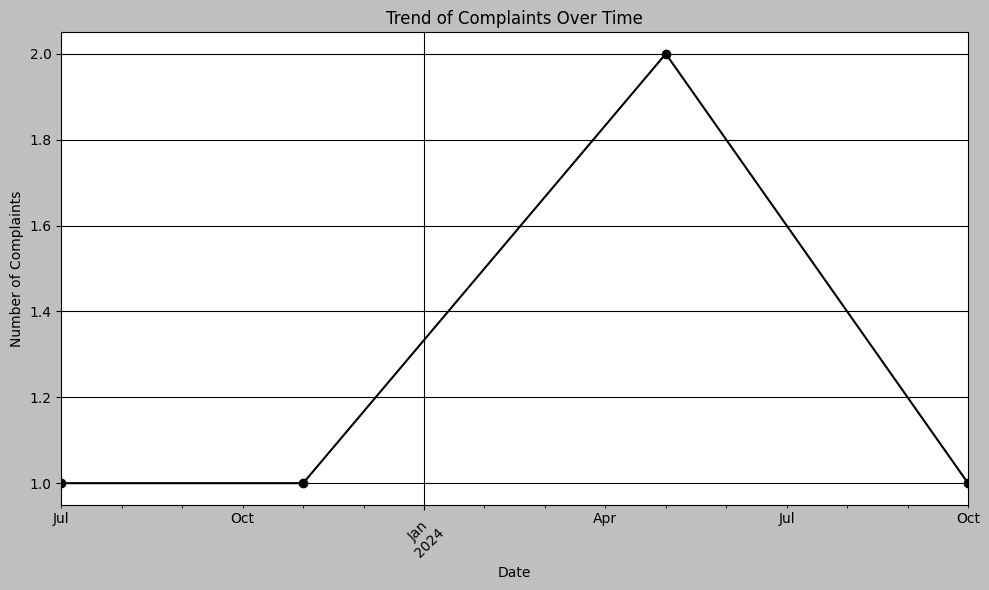

{'input': 'Can you create a line graph showing the trend of complaints over time?',
 'output': 'Here is a line graph showing the trend of complaints over time. The x-axis represents the date (by month), and the y-axis represents the number of complaints. The graph provides a visual representation of how the number of complaints has changed over the given time period.'}

In [77]:
import pandas as pd
agent.invoke("Can you create a line graph showing the trend of complaints over time?")

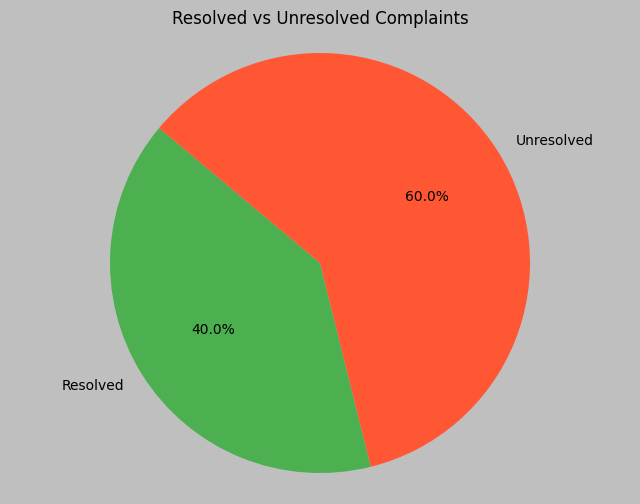

{'input': 'Can you generate a pie chart of resolved vs. unresolved complaints?',
 'output': 'Here is the pie chart showing the distribution of resolved vs. unresolved complaints:\n\n- The green section represents resolved complaints.\n- The red section represents unresolved complaints.\n\nThe chart provides a visual representation of the proportion of complaints that have been resolved compared to those that are still pending or in progress.'}

In [78]:
import pandas as pd
agent.invoke("Can you generate a pie chart of resolved vs. unresolved complaints?")

In [87]:
import pandas as pd
import pprint
a=agent.invoke("What are the top 5 actionable insights you can provide from this dataset?")
pprint.pprint(a["output"])

ValueError: invalid literal for int() with base 10: 'To provide actionable insights from the dataset, we need to analyze the data to identify patterns, trends, and areas for improvement. Here are the top 5 actionable insights that could be derived from